# Importing important libraries

In [1]:


import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use = "ggplot"
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 7)
sns.set(rc={'figure.figsize': (15, 7)})  # For making the seaborn plots the same size
pd.set_option('display.float_format', lambda x: '%.3f' % x) #prevent python from printing exponents
from scipy.stats import norm
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn import pipeline
from sklearn import linear_model
from sklearn import ensemble
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score, roc_auc_score
from math import sqrt
import xgboost as xgb


import warnings
warnings.filterwarnings('ignore')

# Reading Tables into Python using Pandas

Import all readings table

In [2]:
path = r'C:\Users\haven\Documents\docs copy\docs copy' # csv files location on my PC
csv_files = glob.glob(path + "/*.csv")
all_files = []

# loop over the list of csv files
for file in csv_files:
      
    # read the csv file
    df = pd.read_csv(file, header = 0, sep=";", delimiter=";", decimal = ",", index_col=False)
    all_files.append(df) # saving all the file names in a list
      
    # print the location and filename
    print('Location:', file)
    print('File Name:', file.split("\\")[-1])
      
    # print the content
    print('Content:')
    display(df)
    print()

Location: C:\Users\haven\Documents\docs copy\docs copy\bodytype.csv
File Name: bodytype.csv
Content:


,id,title,description,sailthru_tag
0,2,Saloons,Saloon vehicles,saloons
1,3,Hatchbacks,Hatchback Vehicles,hatchbacks
2,4,4 Wheel Drives & SUVs,4 Wheel Drives & SUVs,suvs
3,5,Station Wagons,Station Wagons,station wagons
4,6,Pickups,Pickups,pickups
5,7,Motorbikes,Motorbikes,motorbikes
6,8,Convertibles,Convertibles,convertibles
7,9,"Buses, Taxis and Vans","Buses, Taxis and Vans",vans
8,10,Trucks,Trucks,trucks
9,11,Machinery and Tractors,Machinery and Tractors,tractors



Location: C:\Users\haven\Documents\docs copy\docs copy\categories.csv
File Name: categories.csv
Content:


,id,title,slug,price_guide
0,1,Alfa Romeo,alfa-romeo,0
1,2,Aston Martin,aston-martin,0
2,3,Audi,audi,0
3,4,Bentley,bentley,0
4,5,BMW,bmw,0
...,...,...,...,...
15915,16132,VS150,vespa-vs150,0
15916,16133,208 D,mercedes-benz-208-d,0
15917,16134,208DA,mercedes-benz-208da,0
15918,16135,Truck,jmc-truck,0



Location: C:\Users\haven\Documents\docs copy\docs copy\condition.csv
File Name: condition.csv
Content:


,id,title,description
0,1,Brand New,Brand New
1,2,Foreign Used,Foreign Used
2,3,Locally Used,Locally Used



Location: C:\Users\haven\Documents\docs copy\docs copy\listing.csv
File Name: listing.csv
Content:


,id,old_id,title,location_id,listing_status_id
0,586520,1,Toyota Avalon,2,2
1,586521,2,Toyota Camry,2,2
2,586522,3,Toyota HiAce,2,2
3,586523,4,Honda Accord,2,2
4,586524,5,Man ERF,2,2
...,...,...,...,...,...
775194,2234858,0,Toyota RAV4 Limited,2,5
775195,2234859,0,Land Rover Range Rover Sport 4.4 V8,2,5
775196,2234860,0,Toyota Camry SE,2,5
775197,2234861,0,Lexus ES 350,2,5



Location: C:\Users\haven\Documents\docs copy\docs copy\trueprices.csv
File Name: trueprices.csv
Content:


,id,make_id,model_id,series_id,is_verified_dealer,price,year_of_manufacture,domain_id,listing_id,condition_type_id,body_type_id
0,1,19,809,5540,0,400000,1997,6,1596322,3,2
1,2,57,1706,10782,0,1700000,2009,6,1596328,3,2
2,3,13339,13812,0,1,3300000,2010,6,1596330,3,2
3,4,30,1051,15359,0,2300000,2003,6,1596332,2,2
4,6,57,1698,10714,0,3700000,2008,6,1596337,2,2
...,...,...,...,...,...,...,...,...,...,...,...
195260,628346,29,13743,14321,1,22000000,2014,6,2234706,2,4
195261,628347,35,1184,0,1,6200000,2011,6,2234758,2,2
195262,628348,38,1242,0,1,3800000,2008,6,2234764,3,4
195263,628349,19,817,0,1,3800000,2014,6,2234765,3,4


# Descriptive Statistics
Univariate and multivariate analysis to help understand the values of car prices and how some other variables affect it.


In [3]:
#importing all the files into pandas dataframe using their names
trueprices = pd.read_csv('trueprices.csv', header = 0, sep=";", delimiter=";", decimal = ",", index_col=False)
bodytype = pd.read_csv('bodytype.csv', header = 0, sep=";", delimiter=";", decimal = ",", index_col=False)
categories = pd.read_csv("categories.csv", header = 0, sep=";", delimiter=";", decimal = ",", index_col=False)
condition = pd.read_csv("condition.csv", header = 0, sep=";", delimiter=";", decimal = ",", index_col=False)
listing = pd.read_csv("listing.csv", header = 0, sep=";", delimiter=";", decimal = ",", index_col=False)

In [4]:
for file in csv_files:
    print("The name is the dataset file is: {}" .format(file.split("\\")[-1]))

for file in all_files:
    print ("The corresponding shape/size of the dataset is: {}".format(file.shape))

The name is the dataset file is: bodytype.csv
The name is the dataset file is: categories.csv
The name is the dataset file is: condition.csv
The name is the dataset file is: listing.csv
The name is the dataset file is: trueprices.csv
The corresponding shape/size of the dataset is: (15, 4)
The corresponding shape/size of the dataset is: (15920, 4)
The corresponding shape/size of the dataset is: (3, 3)
The corresponding shape/size of the dataset is: (775199, 5)
The corresponding shape/size of the dataset is: (195265, 11)


## Univariate Analysis for car prices.

The challenge is to predict the price of different vehicle models. This variable is usually referred to as the `target` variable in statistical and machine learning models. <br>
For this task, this variable is stored in the `price` column of the `trueprice` dataset.<br>

First, let us check for missing values.

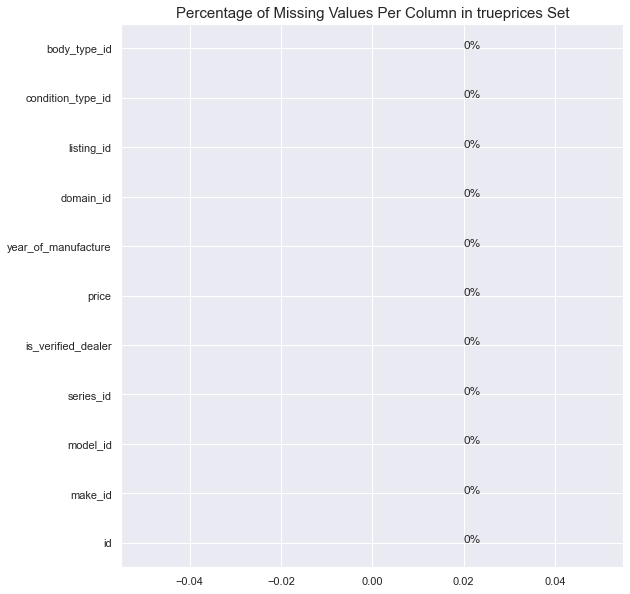

In [5]:
# Check if there any missing values in trueprices set
ax = trueprices.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in trueprices Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/trueprices.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

There are no missing values in this data set. 

Now, we can use the `series.describe` function to give us the `five summary statistics` for the numerical columns of the dataset. The reason for this is to understand the nature of the data before we merge it with other datasets.

In [6]:
trueprices.price.describe()

count         195265.000
mean        13614721.784
std       2473328923.824
min                1.000
25%          2100000.000
50%          3300000.000
75%          5900000.000
max     971555325282.000
Name: price, dtype: float64

In [7]:
trueprices.price.mean()

13614721.784369959

In [8]:
print("The average price of the {} sold cars is about NGN {}". format(trueprices.price.count(), trueprices.price.mean()))
print("The high value of standard deviation (std) of {} signifies the relative wide range in car prices". format(trueprices.price.std()))

The average price of the 195265 sold cars is about NGN 13614721.784369959
The high value of standard deviation (std) of 2473328923.823568 signifies the relative wide range in car prices


The difference between the 50th percentile, the mean and maximum (max) price suggeest that the majority of cars sold fall below NGN 3.3m, as such the price distribution curve will be skewed towards the left.

In [9]:
#print ("Skewness is:", trueprices.price.skew())
#print("Kurtosis is:", trueprices.price.kurt())
#plt.hist(trueprices.price, color='blue', bins = 5)
#plt.show()

In statistics, a data with both skewness and kurtosis close to zero means that the data is very close to being a normal distribution. Clearly, our data here is not normally distributed given the value of the skewness and kurtosis. The skewness shows where the longer tail of the distribution lies, hence a positive skewness means the longer tail goes towards the right.
The kurtosis shows how sharp the tip (relative to a standard bell curve) of the distribution is. The closer to zero it is, the normal our data looks. Hence we need to improve the normality or linearity of our data set.
The values of our skewness and kurtosis clearly signifies that our car price distribution is a long way from being normally distributed, hence a need to improve the linearity and distribution of car price distribution.

### Improving the Shape and Linearity of the distribution

As we will need to perform a regression analysis on this data set, which has turned out to be right skewed, we need to improve on its linearity, i.e to normalise the data. One way to do this is to log-transform the data. Although, the predictions will also be log-transformed at the end of this analysis, we will have to transform them, back to their original forms at the end.

Using the np.log() function to transform the car price data and setting it as our **target variable** for prediction, after which we will now check for the skewness of this transformation using a histogram still;

In [10]:
#target = np.log(trueprices.price)
#print ("Skew is:", target.skew())
#plt.hist(target, color='blue')
#plt.show()

In [11]:
#print("Skewness is:", target.skew())
#print("Kurtosis is:", target.kurt())

#sns.distplot(target, color='blue')

After using the log transformation function to transform our data, the car price data now close very close to being normally distributed. This can be seen as the values for the skewness and kurtosis are now closer to zero than before.

The line plot below compares the initial distribution shape of our data set with that of the transformed (normalised) data set. While the probability plot compares the linearity of our transformation to that of a perfectly linear data set.

In [12]:
#sns.distplot(target, fit=norm)
#fig = plt.figure()
#res = stats.probplot(target, plot=plt)

Although, our data still does not look perfectly linear, we have most of the values within our line of best fit, as such this is somethin we can work with to create a predictive model.

## Merging Datasets

### Working with numerical features

Considering some numeric features, taking a look at them and plotting them on charts for further exploration. The .select.dtypes() method returns a subset of columns matching the specified data types (where num_cols = numeric features).

In [13]:
num_cols = trueprices.select_dtypes(include=[np.number])
num_cols.dtypes

id                     int64
make_id                int64
model_id               int64
series_id              int64
is_verified_dealer     int64
price                  int64
year_of_manufacture    int64
domain_id              int64
listing_id             int64
condition_type_id      int64
body_type_id           int64
dtype: object

The trueprices data presently lists all columns as numerical. The contents of some of these columns do not agree with this. Now, we will merge this dataset with other datasets to get the true datatypes of some of the columns in the data which have links with other datasets. To aid this merging we will consider the followiing important things about out datasets, which help us to see how they are linked with the trueprices dataset:

- The id column of the bodytype dataset is directly linked to the body_type_id column of the trueprices dataset
- The id column of the condition dataset is directly linked to the condition_type_id of the trueprices dataset
- The id column of the listing dataset is directly linked to the listing_id column of the trueprices dataset
- The id column of the categories dataset is directly linked to the model_id column of the trueprices dataset

The relationship between the trueprpices dataset and the other datasets provided will be used to merge them into one big dataset, which we will use for predictive modelling. During the merging, some columns which do not have relevant information, or holds duplicate information with another column will be dropped or not even merged at all.

# Feature Engineering

### Merging datasets

In [14]:
print("Dimesions before merging dataframes:" + str(trueprices.shape))

merger1 = trueprices.copy()

merger1 = pd.merge(merger1, bodytype[['id', 'sailthru_tag']], left_on='body_type_id', right_on='id', how= "left") # merging the dataset
merger1 = merger1.drop(['id_y'], axis=1) # removing column avoid duplicating column names

merger2 = pd.merge(merger1, categories[['id', 'slug']], left_on='model_id', right_on='id', how= "left") # merging the dataset
merger2 = merger2.drop(['id'], axis=1) # removing column avoid duplicating column names

merger3 = pd.merge(merger2, condition[['id', 'description']], left_on='condition_type_id', right_on='id', how= "left") # merging the dataset
merger3 = merger3.drop(['id'], axis=1) # removing column avoid duplicating column names

all_data = pd.merge(merger3, listing[['id', 'title', 'location_id', 'listing_status_id']], left_on='listing_id', right_on='id', how= "left") # merging the dataset
all_data = all_data.drop(['id'], axis=1) # removing column avoid duplicating column names

all_data = all_data.rename(columns={'id_x': 'id'}) # renaming original id column to original name

print("Dimesions after merging dataframes:" + str(all_data.shape))

Dimesions before merging dataframes:(195265, 11)
Dimesions after merging dataframes:(195265, 17)


In [15]:
# checking for duplicates again
all_data.id.duplicated().value_counts()

False    195265
Name: id, dtype: int64

In [16]:
all_data.head()

,id,make_id,model_id,series_id,is_verified_dealer,price,year_of_manufacture,domain_id,listing_id,condition_type_id,body_type_id,sailthru_tag,slug,description,title,location_id,listing_status_id
0,1,19,809,5540,0,400000,1997,6,1596322,3,2,saloons,honda-accord,Locally Used,Honda Accord EX V6 Automatic,2.000,2.000
1,2,57,1706,10782,0,1700000,2009,6,1596328,3,2,saloons,toyota-corolla,Locally Used,Toyota Corolla Corolla,2.000,2.000
2,3,13339,13812,0,1,3300000,2010,6,1596330,3,2,saloons,acura-tl,Locally Used,Acura TL,2.000,2.000
3,4,30,1051,15359,0,2300000,2003,6,1596332,2,2,saloons,lexus-es,Foreign Used,Lexus ES 300,2.000,2.000
4,6,57,1698,10714,0,3700000,2008,6,1596337,2,2,saloons,toyota-camry,Foreign Used,Toyota Camry XLE Automatic,2.000,2.000


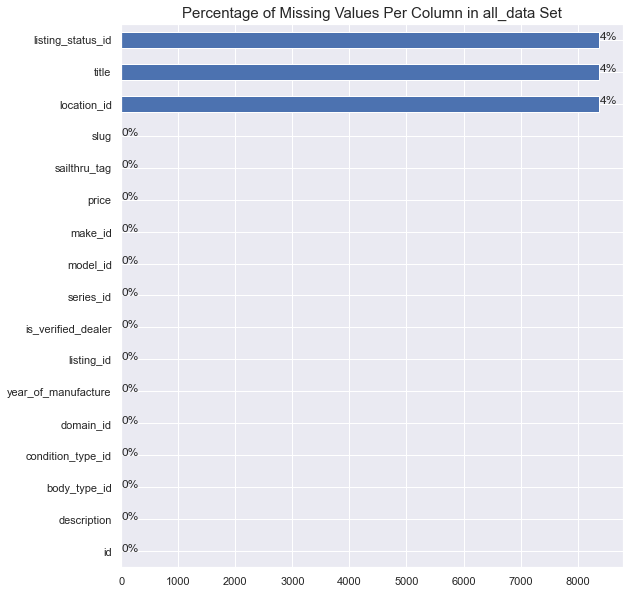

In [17]:
# Check if there any missing values in all_data set
ax = all_data.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in all_data Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/all_data.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

Some cars which have been sold, as described by our initial trueprices dataset do not have information about `listing_status_id`, `listing_title` and `loocation_id`. All three variables which are from the listing dataset have been found after merging all the datasets together. This has to be double checked and data quality needs to be improved to avoid this situations like this.

It should also be noted that some id columns such as `body_type_id`, `condition_type_id`, `listing_id` and `make_id` now have their categorical components merged with the data in the form of text/object variables and as such will be dropped at some point during this feature engineering process.

In [18]:

for i in all_data.columns:
    duplicate_count = all_data.columns.duplicated().sum()
    print("There are {} duplicated values in the {} column" .format(duplicate_count, i))

There are 0 duplicated values in the id column
There are 0 duplicated values in the make_id column
There are 0 duplicated values in the model_id column
There are 0 duplicated values in the series_id column
There are 0 duplicated values in the is_verified_dealer column
There are 0 duplicated values in the price column
There are 0 duplicated values in the year_of_manufacture column
There are 0 duplicated values in the domain_id column
There are 0 duplicated values in the listing_id column
There are 0 duplicated values in the condition_type_id column
There are 0 duplicated values in the body_type_id column
There are 0 duplicated values in the sailthru_tag column
There are 0 duplicated values in the slug column
There are 0 duplicated values in the description column
There are 0 duplicated values in the title column
There are 0 duplicated values in the location_id column
There are 0 duplicated values in the listing_status_id column


# Preparing data for machine learning model

## Adjusting variable types

In [19]:
all_data.head(3)

,id,make_id,model_id,series_id,is_verified_dealer,price,year_of_manufacture,domain_id,listing_id,condition_type_id,body_type_id,sailthru_tag,slug,description,title,location_id,listing_status_id
0,1,19,809,5540,0,400000,1997,6,1596322,3,2,saloons,honda-accord,Locally Used,Honda Accord EX V6 Automatic,2.000,2.000
1,2,57,1706,10782,0,1700000,2009,6,1596328,3,2,saloons,toyota-corolla,Locally Used,Toyota Corolla Corolla,2.000,2.000
2,3,13339,13812,0,1,3300000,2010,6,1596330,3,2,saloons,acura-tl,Locally Used,Acura TL,2.000,2.000


Some columns, such as `locatio_id` and `listing_status_id` which in the least, should be integer type columns are being displayed as float types. First we will adjust this. These columns actually have the features of categorical data, as such their missing values will be filled with the `modal` class of the column. After filling the missing values, we will then convert them to categorical columns.

In [23]:

missing_cols = all_data[['location_id', 'listing_status_id', 'title']]

for col in missing_cols:
    all_data[col].fillna(all_data[col].mode(), inplace=True)
    
all_data[['listing_status_id', 'domain_id', 
          'is_verified_dealer', 'condition_type_id', 'body_type_id', 'description']] = all_data[[
                             'listing_status_id', 'domain_id', 'is_verified_dealer', 
                             'condition_type_id', 'body_type_id', 'description']].astype('category')
   

categoricals = all_data[['listing_status_id', 'domain_id', 'is_verified_dealer', 
                            'condition_type_id', 'body_type_id', 'description']]


In [21]:
all_data.dtypes

id                        int64
make_id                   int64
model_id                  int64
series_id                 int64
is_verified_dealer     category
price                     int64
year_of_manufacture       int64
domain_id              category
listing_id                int64
condition_type_id      category
body_type_id           category
sailthru_tag             object
slug                     object
description            category
title                    object
location_id             float64
listing_status_id      category
dtype: object

## Split data into train and test data (train_test_split)

In [31]:
# Select main columns to be used in training
main_cols = all_data.columns.difference(['id', 'price'])
train = all_data[main_cols]
X = pd.get_dummies(train)
y = np.log(all_data.price)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=23)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((136685, 4950), (136685,), (58580, 4950), (58580,))

In [32]:
xg = ensemble.RandomForestRegressor()
xg_hist = xg.fit(X_train, y_train)

MemoryError: Unable to allocate 2.52 GiB for an array with shape (136685, 4950) and data type float32